In [2]:
import json
import pandas as pd
import numpy as np

# import regular expressions 

import re

In [3]:
file_dir = 'wikipedia-movies.json'

In [4]:
f'{file_dir}wikipedia-movies.json'

'wikipedia-movies.jsonwikipedia-movies.json'

In [5]:
# using the with statement, open the wiki json file to be read into the variable file

with open(f'{file_dir}', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [6]:
# use len function to see how many records are in the file

len(wiki_movies_raw)

7311

In [7]:
# get first 5 records from the dictionary

wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [8]:
# get the last 5 records

wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [9]:
# get some records in the middle

wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [10]:
kaggle_metadata = pd.read_csv('movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'ratings.csv')

In [11]:
kaggle_metadata.sample(n=7)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
15058,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}, {'id': 964...",NaN,33226,tt1303889,en,Rembrandt's J'Accuse...!,J'accuse is an 'essay-istic' documentary in wh...,...,2008-10-04,0.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Rembrandt's J'Accuse...!,False,8.5,4.0
11130,False,NaN,135000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,82,tt0430357,en,Miami Vice,Miami Vice is a feature film based on the 1980...,...,2006-07-27,163794509.0,134.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No Law. No Rules. No Order.,Miami Vice,False,5.7,494.0
15924,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 878, '...",NaN,27441,tt0062827,en,Countdown,A scientist (James Caan) replaces a military o...,...,1968-02-01,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The motion picture that puts a man on the moon...,Countdown,False,2.9,4.0
34832,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,369230,tt3734678,it,Loro chi?,David's life is changed forever after his meet...,...,2015-11-19,0.0,95.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Them who?,False,6.2,75.0
31255,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",NaN,57327,tt0119923,de,Post coïtum animal triste,The end of an affair from the woman's point of...,...,1997-08-29,0.0,97.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Post Coitum,False,6.0,2.0
38475,False,NaN,0,[],NaN,166770,tt1255901,en,Sullivans Banken,Emigholz presents the buildings of the great A...,...,2001-02-09,0.0,38.0,[],Released,NaN,Sullivan's Banks,False,0.0,0.0
25720,False,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,28532,tt0057993,en,Danza macabra,A writer accepts a bet that he cannot spend th...,...,1964-02-27,0.0,87.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,The living and the dead change places in an or...,Castle of Blood,False,7.5,11.0


In [12]:
ratings.sample(n=7)

,userId,movieId,rating,timestamp
6802040,70215,69122,3.0,1353404562
647509,6585,5952,4.5,1222661998
8850125,91244,6863,4.0,1494034632
7363091,75866,1573,3.0,945541429
25783440,268299,1261,4.0,1465104599
1159909,11955,1225,4.0,1040086572
660951,6743,161,3.0,832942748


In [13]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [14]:
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# convert columns to list

wiki_movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [16]:
# check if either director or directed by are keys in the dict

if('Director' in movie or 'Directed by' in movie) and 'imdb_link' in movie

SyntaxError: invalid syntax (13378252.py, line 3)

In [ ]:
# create a list comprehension with the filter expression we made and save that to an intermediate variable 
# adding 'no of episodes' to filter
wiki_movies = [movie for movie in wiki_movies_raw
               if('Director' in movie or 'Directed by' in movie)
               and 'imdb_link' in movie
               and 'No. of episodes' not in movie]
len(wiki_movies)

In [ ]:
clean_movies_df = pd.DataFrame(wiki_movies)

In [ ]:
clean_movies_df.head()

In [ ]:
# lamda function example, lambda functions can be used as one-time functions
# they are writen in a single line and are known as "anymomys functions"

square = lambda x: x * x
square(5)

In [ ]:
# write a function to make a copy of the movie and return it

def clean_movie(movie):
    #when we pass movie as a param to the dict() construcor it reserves a new space in memory and copies
    # all of the info in the movie to that new space
    movie_copy = dict(movie) #create a non-destructive copy
    return movie

In [ ]:
# looking at the languages starting with arabic
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

In [ ]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

In [ ]:
sorted(wiki_movies_df.columns.tolist())

In [ ]:
wiki_movies_df[wiki_movies_df['Actor control'].notnull()]['url']

In [ ]:
wiki_movies_df[wiki_movies_df['Adaptation by'].notnull()]

In [ ]:
wiki_movies_df[wiki_movies_df['Polish'].notnull()]

In [ ]:
wiki_movies_df[wiki_movies_df['Hebrew'].notnull()]

In [ ]:
# make an empty dict to hold all the alt titles

def clean_movie(movie):
    movie = dict(movie) # create a non-desctructive copy
    alt_titles = []
    return movie
    # loop through a list of all alt title keys
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        
        # check if the current key exists in the movie object
        if key in movie:
            # if so remove the key-value pair and add to the alt titles dict
            alt_titles[key] = movie[key]
            movie.pop(key)
    # after looping through every key add the alt titles dict to the move object
    if len(alt_titles) > 0:
        movie ['alt_titles'] = alt_titles
        
    # write a function within the other function to consolidate colums with the same data type
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
        
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')       
    
    return movie

In [ ]:
# make a list of cleaned movies with a list comprehension

clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [ ]:
# set wiki_movies_df to be the DF created from clean_movies and print out a column list

wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

In [ ]:
# regex with IMDB ids

wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))

wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

In [ ]:
# get the count of null values for each column is to use a list comprehension 

[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

In [ ]:
# alter list comprehension to make a list of columns that have less than 90% of 
# null values and use those to trim down the dataset

[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

In [ ]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [ ]:
# id which columns need to be converted

wiki_movies_df.dtypes

In [22]:
# drop missing values in box office data

box_office = wiki_movies_df['Box office'].dropna()

In [23]:
def is_not_a_string(x):
    return type(x) != str
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
56      [$6,698,361 (, United States, ), [2]]
77                    [$6,488,144, (US), [1]]
129                [US$1,531,489, (domestic)]
133                          [US$, 4,803,039]
                        ...                  
7212               [$99.6, million, [4], [5]]
7226                   [$365.6, million, [1]]
7227                         [$53.8, million]
7249                     [$435, million, [7]]
7283                   [$529.3, million, [4]]
Name: Box office, Length: 137, dtype: object

In [24]:
# lambda functions doing have a name because they don't need one

lambda x: type(x) != str

<function __main__.<lambda>(x)>

In [25]:
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
56      [$6,698,361 (, United States, ), [2]]
77                    [$6,488,144, (US), [1]]
129                [US$1,531,489, (domestic)]
133                          [US$, 4,803,039]
                        ...                  
7212               [$99.6, million, [4], [5]]
7226                   [$365.6, million, [1]]
7227                         [$53.8, million]
7249                     [$435, million, [7]]
7283                   [$529.3, million, [4]]
Name: Box office, Length: 137, dtype: object

In [26]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7305       $19.4 million
7306       $41.9 million
7307       $76.1 million
7308       $38.4 million
7309        $5.5 million
Name: Box office, Length: 5530, dtype: object

In [27]:
# literal characters are the simplest charachter class. A reg exp made of lit charc will match any string
# if we made a regex of the string "cat" and used it to search for any matches in another string 
# "the tomcat was placated with the catch of the day" it would match 3 times
#.        cat         cat.           cat

# however regex also have special characters that make it more powerful
# such as using \d to find any digit from 0 to 9


# As we've seen, \d is a special character that matches any digit from 0 to 9. 
# There are other special characters like \d. The full list is:

# \d will match any digit from 0 to 9.
# \D will match any non-digit character.
# \w matches a word character (a letter, digit, or underscore).
# \W matches any non-word character (anything other than a letter, digit, or underscore, 
#   such as spaces and punctuation).
# \s will match any whitespace character (including spaces, tabs, and newlines).
# \S will match any non-whitespace characters.


In [28]:
# Charachter Sets []

# if we need to be more specific than digits, alphanumeric characters or whitespace charachters
# we can use [] to define a charachter set. For ex "[ceh]at" would match cat, eat, hat, and that, but not rat

# "[a-z]" matches any lowercase letter
# "[A-Z]" matches any uppercase letter
# "[0-9]" matches any digit

# we can also include multiple ranges

# "[a-zA-Z]" matches any lowercase or uppercase letter
# "[a-zA-Z0-9]" matches any alphanumeric character

# Inside of a character set, we can specify a character that we do NOT want to include by 
# prefacing it with a caret: ^

In [29]:
# Escaping: \

# if we use the regex "ca." the dot will match any charachter so cat, car, cab, ca?, ca!

# if we only wanted to search for "ca." specifically then we'd use "ca\." to search specifically for "ca."

# the backslash \ in a regex is called the escape character. It says that the next charachter gets to escape
# it's duties as a special charachter in the regex and act like plain old literal charachter

In [30]:
form_one = r'\$\d+\.?\d*\s*[mb]illion'

In [31]:
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3919

In [32]:
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1566

In [33]:
# make two boolean series and then select the box office values that don't match either

matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [34]:
# this will throw an error!
box_office[(not matches_form_one) and (not matches_form_two)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [35]:
# use the code to see which values in box office don't match either form
# the ~ is similar to "is not" like in logic

box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
82                              $335.000
113                   $4.35-4.37 million
133                        US$ 4,803,039
618                           $5000 (US)
756                         $ 11,146,270
993                             $ 50,004
1113                          35,254,617
1192    $ 407,618 (U.S.) (sub-total) [1]
1506                        $ 11,829,959
1541                          £3 million
1679                            $520.000
1952                        ¥1.1 billion
2132                                 N/A
2193                                $309
2234               US$ 171.8 million [9]
2365                   US$ 3,395,581 [1]
2371            $ 1,223,034 ( domestic )
2458                            $282.175
2757            $ 104,883 (US sub-total)
2784         926,423 admissions (France)
2817      $ 1.7 million (US) (sub-total)
2946                            $414.000
3050                            $621.000
3222           $

In [38]:
# adding \s* to account for the space between the $ and the number
# adding [\.] to form two to account for thousands seperators that are periods
# adding (?!\s[mb]illion) to account for million or billion after the number,negative look ahead
# account for million being misspelled by adding ? after the second i

form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [39]:
# solve for values given as a range, using replace() method 

box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [40]:
# extract and convert the box office values
# str.extract returns a DF where every column is the data that matches a capture group

box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7305,$19.4 million
7306,$41.9 million
7307,$76.1 million
7308,$38.4 million


In [41]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
        
        # remove dollar sign and " million"
        
        s = re.sub('\$|\s|[a-zA-Z]','', s)
        
        # convert to float and multiply by a million
        
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
        
        # remove dollar sign and " billion"
        
        s = re.sub('\$|\s|[a-zA-Z]','', s)
        
        # convert to float and multiply by a billion
        value = float(s) * 10**9
        
        # return value
        return value
        
    # if input is of the form $###,###,###
    
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):
        
        # remove dollar sign and commas
        
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [42]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [43]:
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7306    41900000.0
7307    76100000.0
7308    38400000.0
7309     5500000.0
7310           NaN
Name: box_office, Length: 7311, dtype: float64

In [44]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [45]:
# create a budget variable 

budget = wiki_movies_df['Budget'].dropna()

In [46]:
# convert any list to strings

budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [47]:
# then remove any values between a dollar sign and a hyphen 

budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [48]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

139                         Unknown
210     60 million Norwegian Kroner
490                         Unknown
638     60 million Norwegian Kroner
1011            $34 [3] [4] million
1171               $120 [4] million
1276                        Unknown
1331                            HBO
1429                     £6,000,000
1455                     13 million
1541                   £2.8 million
1817                   CAD2,000,000
2002     PHP 85 million (estimated)
2038                    102,888,900
2043                   3,500,000 DM
2064                     ₤2,300,874
2390                     $14 milion
2563                     ₤6,350,000
3278                   € 40 million
3495               $150 [6] million
3553                        $218.32
3947                   £4.2 million
4053                            N/A
4108                    760,000 USD
4648                       19 crore
4827                    £17 million
5224              $$200 [4] million
5247           $155 [2] [3] 

In [49]:
# remove the citation references 

budget = budget.str.replace(r'\[\d+\]\s*','')
budget[~matches_form_one & ~matches_form_two]

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


139                         Unknown
210     60 million Norwegian Kroner
490                         Unknown
638     60 million Norwegian Kroner
1011                    $34 million
1171                   $120 million
1276                        Unknown
1331                            HBO
1429                     £6,000,000
1455                     13 million
1541                   £2.8 million
1817                   CAD2,000,000
2002     PHP 85 million (estimated)
2038                    102,888,900
2043                   3,500,000 DM
2064                     ₤2,300,874
2390                     $14 milion
2563                     ₤6,350,000
3278                   € 40 million
3495                   $150 million
3553                        $218.32
3947                   £4.2 million
4053                            N/A
4108                    760,000 USD
4648                       19 crore
4827                    £17 million
5224                  $$200 million
5247                   $155 

In [50]:
# parse the budget values 

wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [51]:
wiki_movies_df['budget']

0       20000000.0
1        6000000.0
2       35000000.0
3       12000000.0
4       25000000.0
           ...    
7306    42000000.0
7307    60000000.0
7308    20000000.0
7309     9000000.0
7310           NaN
Name: budget, Length: 7311, dtype: float64

In [52]:
# drop the original budget column

wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [53]:
# make a variable that holds the non-null values of release date in the DF

release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [54]:
# parse release date

date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [55]:
# extract the dates

release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7306,"December 25, 2018"
7307,"December 11, 2018"
7308,"November 8, 2018"
7309,"August 31, 2018"


In [56]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [57]:
# parse running time

running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [58]:
# checking how many entries look like "100 minutes"
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6596

In [59]:
# how many other entries look different?

running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6719       114 minutes [1] 120 minutes (extended edition)
6866                                             104 mins
6934    90 minutes (theatrical) [1] 91 minutes (unrate...
7292    108 minutes (Original cut) 98 minutes (UK cut)...
7310                Variable; 90 minutes for default path
Name: Running time, Length: 373, dtype: object

In [60]:
# make this more general by only marking the beginning of the string
# and accepting other abrvs of "minutes" by only searching up to the letter m

running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()


6951

In [61]:
# check the remaining entries

running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

651                                                  3:52
689                     UK:84 min (DVD version) US:86 min
751                         78-102 min (depending on cut)
869                       Varies (79 [3] –84 [1] minutes)
1454                                                 3:52
1503    United States: 77 minutes Argentina: 94 minute...
1560                                            1hr 35min
1615                                               varies
1859                    Netherlands:96 min, Canada:95 min
1862                                       approx. 14 min
2382                                           1 h 43 min
3123                                               1h 48m
4074                                              4 hours
4599    US domestic version: 86 minutes Original versi...
5156    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5621                    115 [1] /123 [2] /128 [3] minutes
5645                                    1 hour 32 minutes
7310          

In [62]:
# eliminating the ^ relaxes the condition

running_time[running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE, na=False) != True]

651        3:52
1454       3:52
1615     varies
4074    4 hours
Name: Running time, dtype: object

In [63]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [65]:
# convert to values from string
# to_numeric method used for the empty strings we captured and set the errors arguement to 'coerce'
# coercing the errors will turn the empty strings into NOT a Number (NAN) then we can use fillna() to change 
# all the NANs to zeros

running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)



In [66]:
# convert hour capture groups and minute capture groups to minutes if the pure minutes capture group is 
# zero and save the output to wiki_movies_df

wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [67]:
# can drop Running time from the dataset

wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [68]:
# inspect the kaggle data

kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [69]:
# check if adult and video values are either true or false

kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [70]:
#. remove bad data

kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# keep rows where the adult column is False and then drop the adult column

kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [73]:
# look at the values in the video column

kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [74]:
# convert video, creating a boolean column

kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [75]:
# assign the boolean column we just made back to video

kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [76]:
# use the to_numeric method from Pandas for numeric columns, 
# we'll make sure the errors= arguementis set to 'raise' so we'll know if there's any data 
# that can't be converted to numbers

kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [77]:
# convert release_date to datetime using Pandas to_datetime()

kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [78]:
# use info() method to look at the ratings data

ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
# convert timestamp to datetime

pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [80]:
# assign datetime conversion to the timestamp column

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

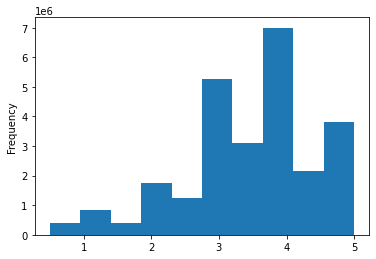

In [81]:
# take the stats of the ratnigs and see if there are any glaring errors

pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()